In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
print("Shape of the dataset:")
print(df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nSummary statistics of the dataset:")
print(df.describe())
print("\nInformation about the dataset:")
print(df.info())
print("\nNumber of missing values in each feature:")
print(np.sum(df.isnull()))

Shape of the dataset:
(21613, 21)

First few rows of the dataset:
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680    

C:\Users\Кирилл\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


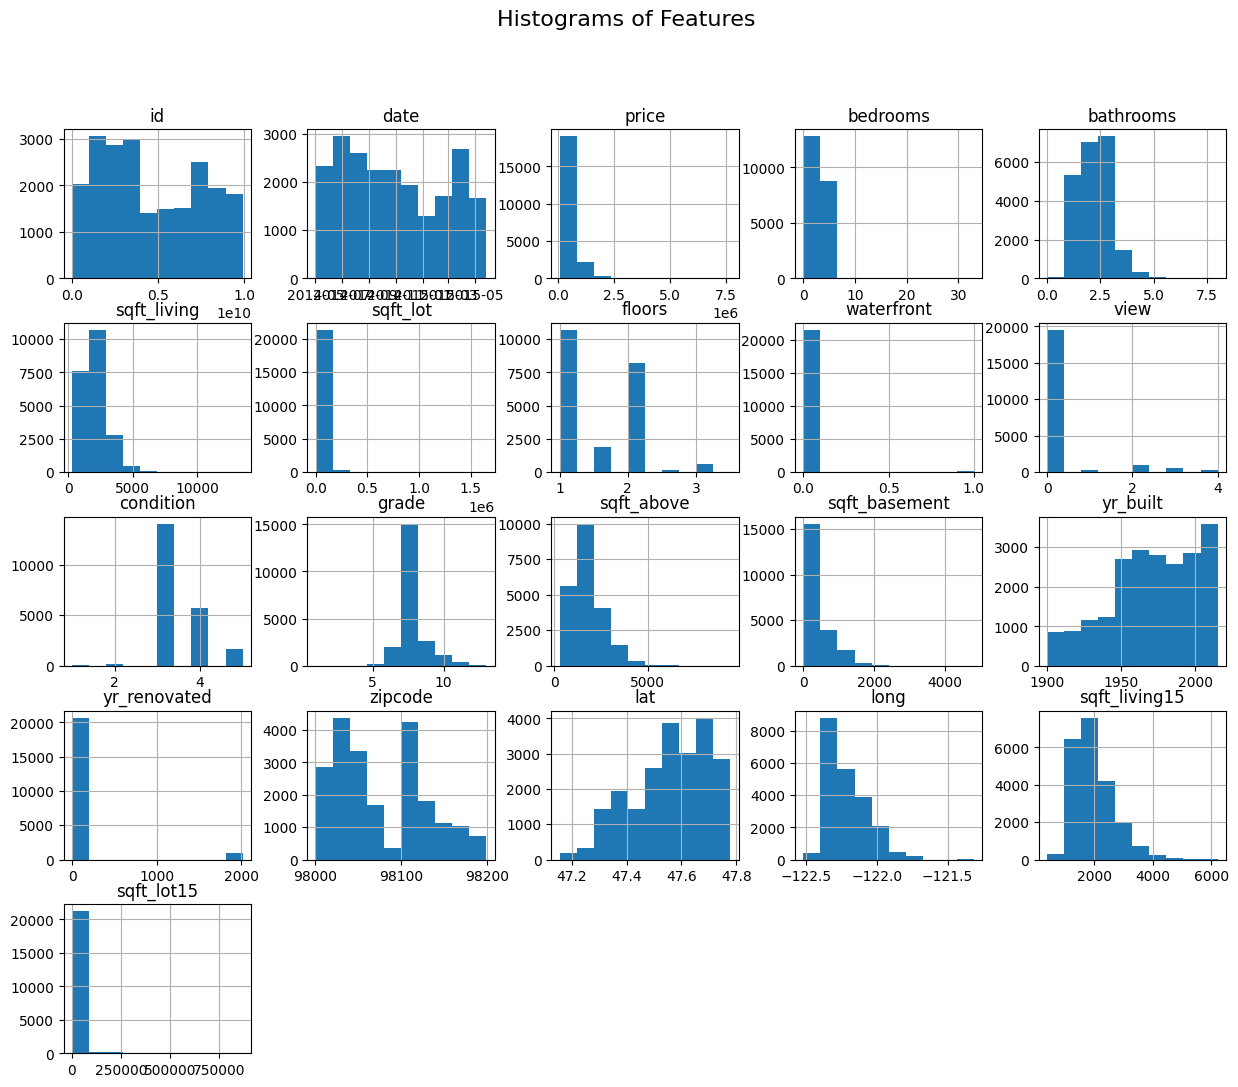

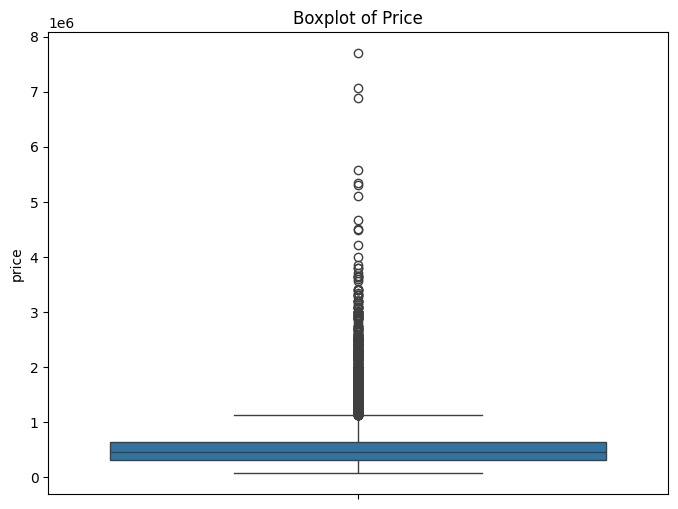

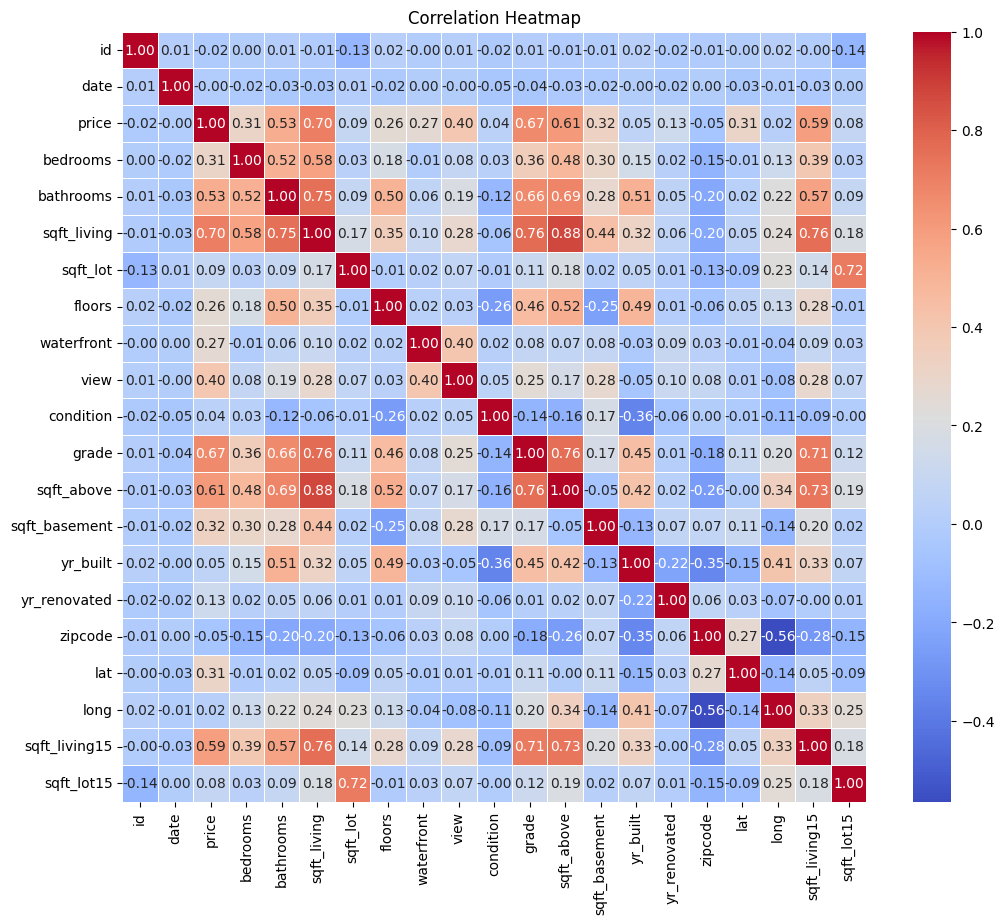

In [8]:
df['date'] = pd.to_datetime(df['date'])
# Гистограммы для каждого признака
df.hist(figsize=(15, 12))
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

# Ящик с усами для цены (price)
plt.figure(figsize=(8, 6))
sns.boxplot(y='price', data=df)
plt.title('Boxplot of Price')
plt.show()

# Точечные 3D-графики для трех признаков (например, bedrooms, bathrooms, sqft_living)
fig = px.scatter_3d(df, x='bedrooms', y='bathrooms', z='sqft_living', color='price')
fig.update_layout(title="3D Scatter Plot of Bedrooms, Bathrooms, and Sqft Living", title_x=0.5)
fig.show()

# Тепловая карта корреляционной матрицы
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

df = pd.read_csv('kc_house_data.csv')

df['yr_built_period'] = pd.cut(df['yr_built'], bins=[1900, 1950, 2000, 2025], labels=['1900-1950', '1950-2000', '2000-2025'])
df['yr_renovated_period'] = pd.cut(df['yr_renovated'], bins=[1900, 1950, 2000, 2025], labels=['1900-1950', '1950-2000', '2000-2025'])

df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('price')  
categorical_features = df.select_dtypes(include=[object]).columns.tolist()  

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = preprocessor.fit_transform(df.drop(['price'], axis=1))  
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# 1) Линейная регрессия (Linear Regression)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_train_pred = linear_model.predict(X_train)
linear_test_pred = linear_model.predict(X_test)

# 2) Регрессия LASSO (Lasso Regression) 
lasso_model = Lasso(max_iter=10000)
lasso_model.fit(X_train, y_train)
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

# 3) Регрессия Ridge (Ridge Regression) - с увеличенным количеством итераций
ridge_model = Ridge(max_iter=10000)
ridge_model.fit(X_train, y_train)
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)


# 4) Полиномиальная регрессия (Polynomial Regression)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_train_pred = poly_model.predict(X_poly_train)
poly_test_pred = poly_model.predict(X_poly_test)


def print_model_performance(name, y_train, train_pred, y_test, test_pred):
    print("Model:", name)
    print("Train MSE:", mean_squared_error(y_train, train_pred))
    print("Test MSE:", mean_squared_error(y_test, test_pred))
    print()

print_model_performance("Linear Regression", y_train, linear_train_pred, y_test, linear_test_pred)
print_model_performance("Lasso Regression", y_train, lasso_train_pred, y_test, lasso_test_pred)
print_model_performance("Ridge Regression", y_train, ridge_train_pred, y_test, ridge_test_pred)
print_model_performance("Polynomial Regression", y_train, poly_train_pred, y_test, poly_test_pred)


C:\Users\Кирилл\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 72872019702726.06, tolerance: 225891453177.8125



Model: Linear Regression
Train MSE: 41229089613.12302
Test MSE: 48455516854.01557

Model: Lasso Regression
Train MSE: 41229838663.77834
Test MSE: 48433960687.12701

Model: Ridge Regression
Train MSE: 41259841598.12672
Test MSE: 48398833184.03079

Model: Polynomial Regression
Train MSE: 14567619705.106594
Test MSE: 70977703107.40404

